In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Data Loading

In [2]:
dataset = fetch_california_housing(as_frame=True)
df = dataset.frame

for col in ['AveRooms', 'AveBedrms', 'AveOccup']:
    df = df[df[col] < df[col].quantile(0.99)]

df = df.reset_index(drop=True)
df.Longitude = - df.Longitude

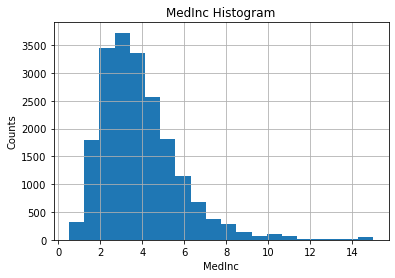

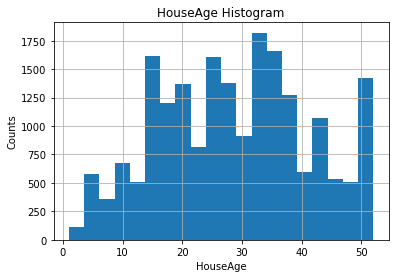

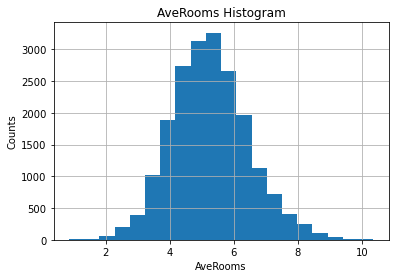

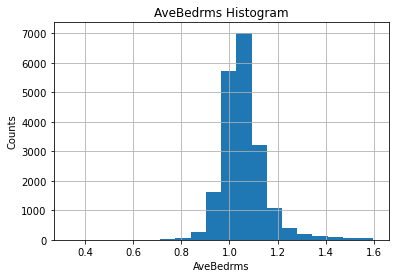

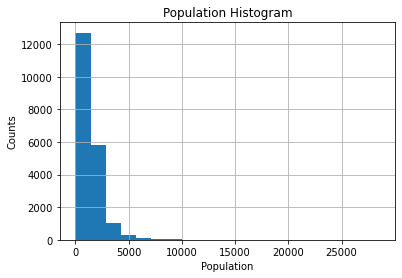

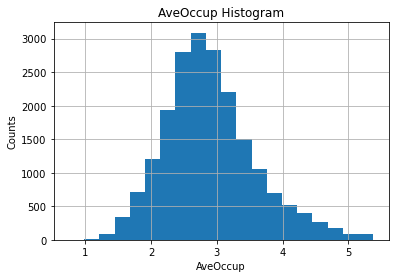

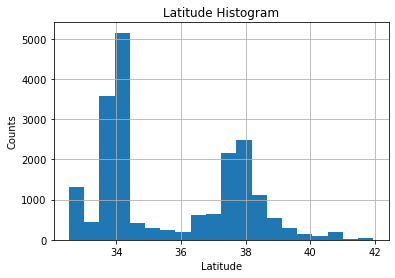

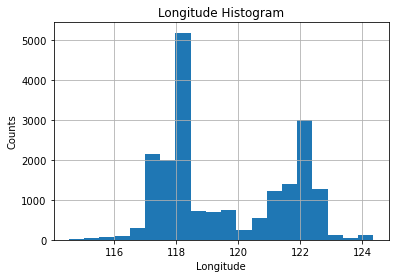

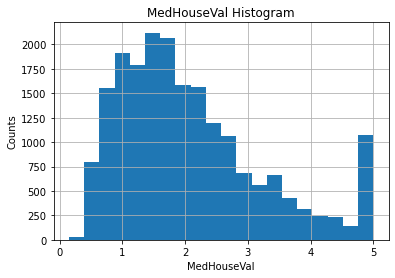

In [3]:
for col in df:
    df[col].hist(bins=20)
    plt.title(f'{col} Histogram')
    plt.ylabel('Counts')
    plt.xlabel(col)
    plt.show()

In [51]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.125305,0.704733,-0.199219,0.003663,-0.067642,-0.077181,0.015555,0.691280
HouseAge,-0.125305,1.000000,-0.212529,-0.113341,-0.318892,-0.015998,0.015981,0.104254,0.102494
AveRooms,0.704733,-0.212529,1.000000,0.129313,-0.022168,-0.005616,0.112532,0.082131,0.351813
AveBedrms,-0.199219,-0.113341,0.129313,1.000000,0.024178,-0.105355,0.056002,0.001925,-0.085013
Population,0.003663,-0.318892,-0.022168,0.024178,1.000000,0.178961,-0.102786,-0.103305,-0.030303
AveOccup,-0.067642,-0.015998,-0.005616,-0.105355,0.178961,1.000000,-0.170159,-0.188274,-0.291502
Latitude,-0.077181,0.015981,0.112532,0.056002,-0.102786,-0.170159,1.000000,0.930701,-0.141671
Longitude,0.015555,0.104254,0.082131,0.001925,-0.103305,-0.188274,0.930701,1.000000,0.044447
MedHouseVal,0.691280,0.102494,0.351813,-0.085013,-0.030303,-0.291502,-0.141671,0.044447,1.000000


In [4]:
train_df, test_df = train_test_split(df, train_size=0.7, random_state=6)

# Simple Linear Regression

## Analytically

In [5]:
X_train, Y_train = train_df.MedInc.to_numpy(), train_df.MedHouseVal.to_numpy()
X_test, Y_test = test_df.MedInc.to_numpy(), test_df.MedHouseVal.to_numpy()

In [6]:
X_mean = X_train.mean()
Y_mean = Y_train.mean()
beta1 = ((X_train - X_mean) * (Y_train - Y_mean)).sum() / ((X_train - X_mean) ** 2).sum()
beta0 = Y_mean - beta1 * X_mean
print(f"beta1 = {beta1:.2e}, beta0 = {beta0:.2e}")

beta1 = 4.24e-01, beta0 = 4.35e-01


## Sequentially ???

## Sklearn

In [7]:
lin_reg = LinearRegression().fit(X_train.reshape(-1, 1), Y_train)
print(f"beta1 = {lin_reg.coef_[0]:.2e}, beta0 = {lin_reg.intercept_:.2e}")

beta1 = 4.24e-01, beta0 = 4.35e-01


In [8]:
print('R^2 = {:.2f}'.format(lin_reg.score(X_test.reshape(-1, 1), Y_test)))

R^2 = 0.48


### Plotting Results

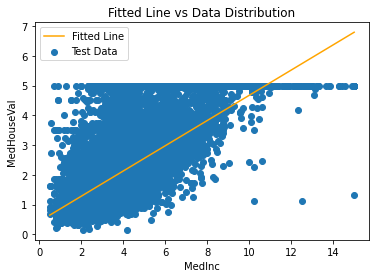

In [9]:
plt.scatter(X_train, Y_train, label='Test Data')

line_x = [X_train.min(), X_train.max()]
line_y = [x * beta1 + beta0 for x in line_x]
plt.plot(line_x, line_y, label='Fitted Line', color='Orange')
plt.title('Fitted Line vs Data Distribution')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

plt.legend()
plt.show()

### Adding 2*MedInc

In [10]:
X_train_dup = np.stack([X_train, 2 * X_train]).T
lin_reg = LinearRegression().fit(X_train_dup, Y_train)

In [11]:
X_test_dup = np.stack([X_test, 2 * X_test]).T
print('R^2 = {:.2f}'.format(lin_reg.score(X_test_dup, Y_test)))

R^2 = 0.48


The R^2 did not change

### All features

In [12]:
X_train = train_df.drop(columns=['MedHouseVal'])
X_test = test_df.drop(columns=['MedHouseVal'])
lin_reg = LinearRegression().fit(X_train, Y_train)
print('R^2 = {:.2f}'.format(lin_reg.score(X_test, Y_test)))

R^2 = 0.68


The results have improved!

### All features but population

In [13]:
X_train = train_df.drop(columns=['MedHouseVal', 'Population'])
X_test = test_df.drop(columns=['MedHouseVal', 'Population'])
lin_reg = LinearRegression().fit(X_train, Y_train)
print('R^2 = {:.2f}'.format(lin_reg.score(X_test, Y_test)))

R^2 = 0.68


The results did not change, therefore population is redundant

In [14]:
X_train = pd.DataFrame([train_df.MedInc, train_df.MedInc.pow(2)]).T
X_test = pd.DataFrame([test_df.MedInc, test_df.MedInc.pow(2)]).T

lin_reg = LinearRegression().fit(X_train, Y_train)
print('The coefficients are', lin_reg.coef_, 'and the bias is', lin_reg.intercept_)

The coefficients are [ 0.53091769 -0.00996211] and the bias is 0.20454417295976834


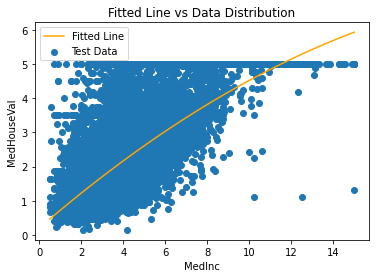

In [15]:
plt.scatter(train_df.MedInc, Y_train, label='Test Data')

coef = lin_reg.coef_
line_x = np.linspace(train_df.MedInc.min(), train_df.MedInc.max())
line_y = line_x * coef[0] + line_x ** 2 * coef[1] + lin_reg.intercept_
plt.plot(line_x, line_y, label='Fitted Line', color='Orange')
plt.title('Fitted Line vs Data Distribution')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

plt.legend()
plt.show()

In [16]:
print('R^2 = {:.2f}'.format(lin_reg.score(X_test, Y_test)))

R^2 = 0.48


The performance did not improve, very little weight was put on the squared income

### Polynomial Regression with Regularization

The coefficients are [ 0.53082231 -0.00995423] and the bias is 0.20476772645938657


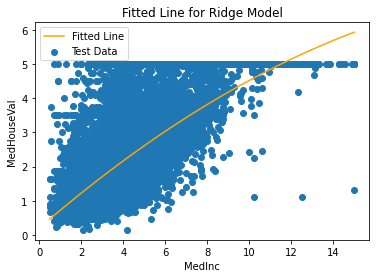

R^2 = 0.48


In [27]:
lin_reg = Ridge().fit(X_train, Y_train)
print('The coefficients are', lin_reg.coef_, 'and the bias is', lin_reg.intercept_)

plt.scatter(train_df.MedInc, Y_train, label='Test Data')
coef = lin_reg.coef_
line_x = np.linspace(train_df.MedInc.min(), train_df.MedInc.max())
line_y = line_x * coef[0] + line_x ** 2 * coef[1] + lin_reg.intercept_
plt.plot(line_x, line_y, label='Fitted Line', color='Orange')
plt.title('Fitted Line for Ridge Model')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

plt.legend()
plt.show()
print('R^2 = {:.2f}'.format(lin_reg.score(X_test, Y_test)))

The coefficients are [0.         0.03171941] and the bias is 1.4891595359862548


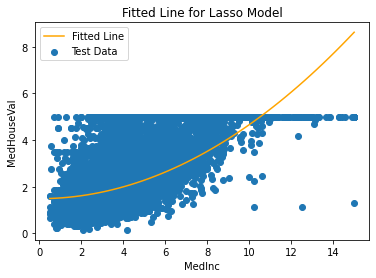

R^2 = 0.39


In [18]:
lin_reg = Lasso().fit(X_train, Y_train)
print('The coefficients are', lin_reg.coef_, 'and the bias is', lin_reg.intercept_)

plt.scatter(train_df.MedInc, Y_train, label='Test Data')
coef = lin_reg.coef_
line_x = np.linspace(train_df.MedInc.min(), train_df.MedInc.max())
line_y = line_x * coef[0] + line_x ** 2 * coef[1] + lin_reg.intercept_
plt.plot(line_x, line_y, label='Fitted Line', color='Orange')
plt.title('Fitted Line for Lasso Model')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

plt.legend()
plt.show()
print('R^2 = {:.2f}'.format(lin_reg.score(X_test, Y_test)))

Lasso regression zeroed out the coefficient for regular income, but caused a decrease in test performance, Ridge did not cause a significant change in the results. I would therefore stick with the regular model.

## Freestyle!

$R^2$ to beat: 0.68

Before adding columns, I'll find the best columns for prediction using forward stepwise selection

In [66]:
def forward_piecewiese_selection(X_train, Y_train, X_test, Y_test, model=LinearRegression):
    feature_selections = []
    features = []
    while len(features) < len(X_train.columns):
        best_score = 0
        best_features = None
        for col in X_train:
            if col not in features:
                cur_features = features + [col]
                lin_reg = model().fit(X_train[cur_features], Y_train)
                score = lin_reg.score(X_train[cur_features], Y_train)
                if score > best_score:
                    best_score = score
                    best_features = cur_features
        features = best_features
        feature_selections.append(features)
        
    best_score = 0
    best_features = 0
    for features in feature_selections:
        lin_reg = model().fit(X_train[features], Y_train)
        score = round(lin_reg.score(X_test[features], Y_test), 3)
        if score > best_score:
            best_score = score
            best_features = cur_features
        
    return best_features, best_score

In [67]:
X_train = train_df.drop(columns=['MedHouseVal'])
X_test = test_df.drop(columns=['MedHouseVal'])
print(forward_piecewiese_selection(X_train, Y_train, X_test, Y_test))

(['MedInc', 'AveOccup', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude', 'Population'], 0.683)


Without adding any features, all base features were chosen. We'll now add parabolic variables.

In [74]:
X_train = train_df.drop(columns=['MedHouseVal'])
X_test = test_df.drop(columns=['MedHouseVal'])

for col in X_train:
    X_train[f'{col}^2'] = X_train[col] ** 2
    X_test[f'{col}^2'] = X_test[col] ** 2

features, score = forward_piecewiese_selection(X_train, Y_train, X_test, Y_test)
print(*features, sep=', ')
print(score)

MedInc, AveOccup, HouseAge, AveOccup^2, Latitude^2, Longitude, AveBedrms, MedInc^2, AveRooms, AveRooms^2, AveBedrms^2, Population, Longitude^2, Latitude, Population^2, HouseAge^2
0.708


This beats our old best score! Now let's try instead to add interactions. Due to tecnical limitations, we'll add interactions between just one variable and the rest at a time.

In [76]:
for col1 in X_train:
    X_train = train_df.drop(columns=['MedHouseVal'])
    X_test = test_df.drop(columns=['MedHouseVal'])

    for col2 in X_train:
        if col1 != col2:
            X_train[f'{col1}*{col2}'] = X_train[col1] * X_train[col2]
            X_test[f'{col1}*{col2}'] = X_test[col1] * X_test[col2]
    
    features, score = forward_piecewiese_selection(X_train, Y_train, X_test, Y_test)
    print(col1, score)

MedInc 0.69
HouseAge 0.695
AveRooms 0.685
AveBedrms 0.686
Population 0.686
AveOccup 0.694
Latitude 0.685
Longitude 0.684


This did not beat the best $R^2$ achieved by polynomial variables.